Libraries

In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss, fbeta_score, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split
from pyBKT.models import Model


In [36]:

df = pd.read_csv('data.csv')

df = df.sort_values(by='Opportunity Count')

unique_students = df['Student ID'].unique()
train_students, test_students = train_test_split(unique_students, test_size=0.2, random_state=50)

train_df = df[df['Student ID'].isin(train_students)]
test_df = df[df['Student ID'].isin(test_students)]

# Define column mappings for PyBKT
defaults = {
    'user_id': 'Student ID',
    'skill_name': 'Skill ID',
    'order_id': 'Opportunity Count',
    'correct': 'Correctness'
}


In [37]:
# Define metrics functions
def f2_score_metric(y_true, y_pred_prob):
    y_pred = (y_pred_prob >= 0.5).astype(int) 
    return fbeta_score(y_true, y_pred, beta=2)

metrics = {
    "RMSE": lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    "AUC": roc_auc_score,
    "Log Loss": log_loss,
    "F2 Score": f2_score_metric
}


Base

🔹 RMSE (Train): 0.3915
🔹 RMSE (Test): 0.3779
🔹 AUC (Train): 0.8570
🔹 AUC (Test): 0.8678
🔹 Log Loss (Train): 0.4728
🔹 Log Loss (Test): 0.4528
🔹 F2 Score (Train): 0.7965
🔹 F2 Score (Test): 0.8123


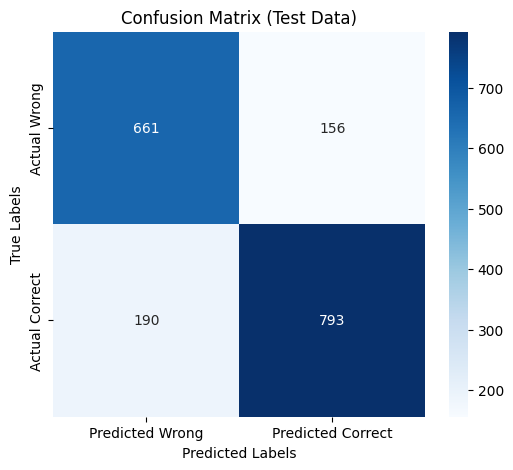

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       817
           1       0.84      0.81      0.82       983

    accuracy                           0.81      1800
   macro avg       0.81      0.81      0.81      1800
weighted avg       0.81      0.81      0.81      1800



In [54]:
# Initialize and train the model
model = Model(seed=42, num_fits=5)
model.fit(data=train_df, defaults=defaults)

# Get predictions for train and test sets
train_preds = model.predict(data=train_df)
test_preds = model.predict(data=test_df)

# Extract actual correctness values (true labels)
y_train_true = train_df['Correctness'].values
y_test_true = test_df['Correctness'].values

# Extract predicted probabilities
y_train_pred_prob = train_preds['correct_predictions'].values
y_test_pred_prob = test_preds['correct_predictions'].values

# Evaluate and print each metric
for metric_name, metric_func in metrics.items():
    train_metric = metric_func(y_train_true, y_train_pred_prob)
    test_metric = metric_func(y_test_true, y_test_pred_prob)
    
    print(f"🔹 {metric_name} (Train): {train_metric:.4f}")
    print(f"🔹 {metric_name} (Test): {test_metric:.4f}")


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to binary predictions (threshold = 0.5)
y_test_pred_binary = (y_test_pred_prob >= 0.5).astype(int)

# Calculate the confusion matrix for the test data
cm = confusion_matrix(y_test_true, y_test_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Wrong', 'Predicted Correct'], yticklabels=['Actual Wrong', 'Actual Correct'])
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


from sklearn.metrics import classification_report

# Convert predicted probabilities to binary predictions (threshold = 0.5)
y_test_pred_binary = (y_test_pred_prob >= 0.5).astype(int)

# Generate the classification report
class_report = classification_report(y_test_true, y_test_pred_binary)

# Print the classification report
print("Classification Report (Test Data):")
print(class_report)



In [ ]:
forgets

In [44]:
# Initialize and train the model with forgets=True
model = Model(seed=42, num_fits=200)
model.fit(data=train_df, defaults=defaults, forgets=True)

# Get predictions for train and test sets
train_preds = model.predict(data=train_df)
test_preds = model.predict(data=test_df)

# Extract actual correctness values (true labels)
y_train_true = train_df['Correctness'].values
y_test_true = test_df['Correctness'].values

# Extract predicted probabilities
y_train_pred_prob = train_preds['correct_predictions'].values
y_test_pred_prob = test_preds['correct_predictions'].values

# Evaluate and print each metric
for metric_name, metric_func in metrics.items():
    train_metric = metric_func(y_train_true, y_train_pred_prob)
    test_metric = metric_func(y_test_true, y_test_pred_prob)
    
    print(f"🔹 {metric_name} (Train): {train_metric:.4f}")
    print(f"🔹 {metric_name} (Test): {test_metric:.4f}")


🔹 RMSE (Train): 0.3917
🔹 RMSE (Test): 0.3792
🔹 AUC (Train): 0.8570
🔹 AUC (Test): 0.8681
🔹 Log Loss (Train): 0.4731
🔹 Log Loss (Test): 0.4545
🔹 F2 Score (Train): 0.7965
🔹 F2 Score (Test): 0.8120


In [11]:
test_df

,Student ID,Skill ID,Opportunity Count,Correctness,TimesTaken,correct_predictions,state_predictions
3105,9,16,1,1,2433,0.21254,0.00000
3165,9,20,1,0,5000,0.06951,0.00000
3195,9,22,1,0,5000,0.14189,0.00000
3210,9,23,1,0,5000,0.06545,0.00000
3225,9,24,1,0,5000,0.14626,0.00000
...,...,...,...,...,...,...,...
7709,22,10,15,1,1367,0.88208,0.99924
7694,22,9,15,1,2379,0.89618,0.99973
7679,22,8,15,1,1357,0.91197,0.99536
7664,22,7,15,1,2472,0.83694,0.98227


In [12]:
defaults = {
    'user_id': 'Student ID',
    'skill_name': 'Skill ID',
    'order_id': 'Opportunity Count',
    'correct': 'Correctness',
    'multilearn': 'Student ID'  # Different learning rates per student
}

model = Model(seed=42, num_fits=5)
model.fit(data=train_df, defaults=defaults, multilearn=True)

# Get predictions for train and test sets
train_preds = model.predict(data=train_df)
#test_preds = model.predict(data=test_df)

# Extract actual correctness values (true labels)
y_train_true = train_df['Correctness'].values
#y_test_true = test_df['Correctness'].values

# Extract predicted probabilities
y_train_pred_prob = train_preds['correct_predictions'].values
#y_test_pred_prob = test_preds['correct_predictions'].values

# Evaluate and print each metric
for metric_name, metric_func in metrics.items():
    train_metric = metric_func(y_train_true, y_train_pred_prob)
    #test_metric = metric_func(y_test_true, y_test_pred_prob)
    
    print(f"🔹 {metric_name} (Train): {train_metric:.4f}")
    #print(f"🔹 {metric_name} (Test): {test_metric:.4f}")



🔹 RMSE (Train): 0.3904
🔹 AUC (Train): 0.8574
🔹 Log Loss (Train): 0.4707
🔹 F2 Score (Train): 0.7969


In [14]:
test_preds

[array([0.82449569, 0.02229224, 0.11903779, 0.1073703 , 0.1087774 ,
        0.1086077 , 0.10862817, 0.1086257 , 0.108626  , 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596, 0.10862596, 0.10862596,
        0.10862596, 0.10862596, 0.10862596]),
 a

In [15]:
test_sequences

[array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1]),
 array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1]),
 array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1]),
 array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 1,

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


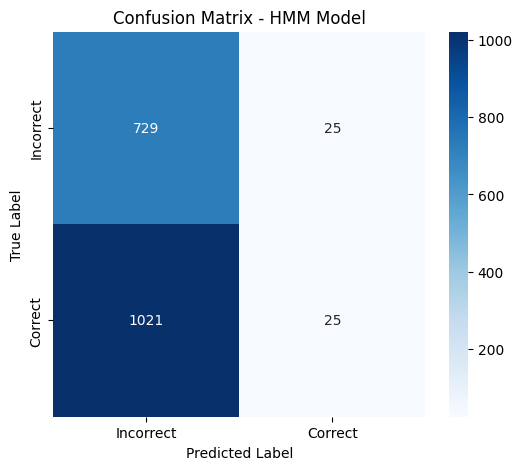


Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.97      0.58       754
           1       0.50      0.02      0.05      1046

    accuracy                           0.42      1800
   macro avg       0.46      0.50      0.31      1800
weighted avg       0.47      0.42      0.27      1800

🔹 RMSE (HMM Test): 0.5304
🔹 Log Loss (HMM Test): 0.7648
🔹 AUC (HMM Test): 0.4975


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.metrics import confusion_matrix, classification_report, log_loss, roc_auc_score, mean_squared_error

# Load data
df = pd.read_csv('data.csv')

# Convert categorical columns to numerical values
df['Student ID'] = df['Student ID'].astype('category').cat.codes
df['Skill ID'] = df['Skill ID'].astype('category').cat.codes

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=50)

# Extract sequences for HMM
train_sequences = [train_df[train_df["Student ID"] == sid]["Correctness"].values for sid in train_df["Student ID"].unique()]
test_sequences = [test_df[test_df["Student ID"] == sid]["Correctness"].values for sid in test_df["Student ID"].unique()]

# Train HMM (2 states: Knowing, Not Knowing)
hmm_model = hmm.MultinomialHMM(n_components=5, n_iter=100, random_state=42)
hmm_model.fit(np.concatenate(train_sequences).reshape(-1, 1))

# Predict probabilities for test set
test_preds = [hmm_model.predict_proba(seq.reshape(-1, 1))[:, 1] for seq in test_sequences]
test_true = np.concatenate(test_sequences)
test_pred_probs = np.concatenate(test_preds)

# Convert probabilities to binary predictions (Threshold = 0.5)
test_pred_binary = (test_pred_probs >= 0.5).astype(int)

# Compute Metrics
rmse = np.sqrt(mean_squared_error(test_true, test_pred_probs))
logloss = log_loss(test_true, test_pred_probs)
auc = roc_auc_score(test_true, test_pred_probs)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(test_true, test_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Incorrect", "Correct"], yticklabels=["Incorrect", "Correct"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - HMM Model")
plt.show()

# Print Classification Report
print("\nClassification Report:\n", classification_report(test_true, test_pred_binary))

# Print Evaluation Metrics
print(f"🔹 RMSE (HMM Test): {rmse:.4f}")
print(f"🔹 Log Loss (HMM Test): {logloss:.4f}")
print(f"🔹 AUC (HMM Test): {auc:.4f}")


In [27]:
from sklearn.model_selection import train_test_split

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=50)

# Extract sequences for HMM
train_sequences = [train_df[train_df["Student ID"] == sid]["Correctness"].values for sid in train_df["Student ID"].unique()]
test_sequences = [test_df[test_df["Student ID"] == sid]["Correctness"].values for sid in test_df["Student ID"].unique()]

# Train HMM (2 states: Knowing, Not Knowing)
hmm_model = hmm.MultinomialHMM(n_components=5, n_iter=100, random_state=42)
hmm_model.fit(np.concatenate(train_sequences).reshape(-1, 1))

# Predict probabilities for train set
train_preds = [hmm_model.predict_proba(seq.reshape(-1, 1))[:, 1] for seq in train_sequences]
train_true = np.concatenate(train_sequences)
train_pred_probs = np.concatenate(train_preds)

# Predict probabilities for test set
test_preds = [hmm_model.predict_proba(seq.reshape(-1, 1))[:, 1] for seq in test_sequences]
test_true = np.concatenate(test_sequences)
test_pred_probs = np.concatenate(test_preds)

# Convert probabilities to binary predictions (Threshold = 0.5)
train_pred_binary = (train_pred_probs >= 0.5).astype(int)
test_pred_binary = (test_pred_probs >= 0.5).astype(int)

# Compute Training Metrics
train_rmse = np.sqrt(mean_squared_error(train_true, train_pred_probs))
train_logloss = log_loss(train_true, train_pred_probs)
train_auc = roc_auc_score(train_true, train_pred_probs)

# Compute Testing Metrics
test_rmse = np.sqrt(mean_squared_error(test_true, test_pred_probs))
test_logloss = log_loss(test_true, test_pred_probs)
test_auc = roc_auc_score(test_true, test_pred_probs)

# Compute Differences
rmse_diff = abs(train_rmse - test_rmse)
logloss_diff = abs(train_logloss - test_logloss)
auc_diff = abs(train_auc - test_auc)

# Print Evaluation Metrics
print(f"🔹 RMSE (Train): {train_rmse:.4f} | (Test): {test_rmse:.4f} | Difference: {rmse_diff:.4f}")
print(f"🔹 Log Loss (Train): {train_logloss:.4f} | (Test): {test_logloss:.4f} | Difference: {logloss_diff:.4f}")
print(f"🔹 AUC (Train): {train_auc:.4f} | (Test): {test_auc:.4f} | Difference: {auc_diff:.4f}")


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


🔹 RMSE (Train): 0.5209 | (Test): 0.5304 | Difference: 0.0095
🔹 Log Loss (Train): 0.7381 | (Test): 0.7648 | Difference: 0.0267
🔹 AUC (Train): 0.4975 | (Test): 0.4975 | Difference: 0.0001


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340



🔹 Model Performance Summary 🔹
✅ RMSE (Train): 0.5209 | (Test): 0.5304 | Difference: 0.0095
✅ Log Loss (Train): 0.7381 | (Test): 0.7648 | Difference: 0.0267
✅ AUC (Train): 0.4975 | (Test): 0.4975 | Difference: 0.0001
✅ F1 Score (Train): 0.0149 | (Test): 0.0456 | Difference: 0.0307


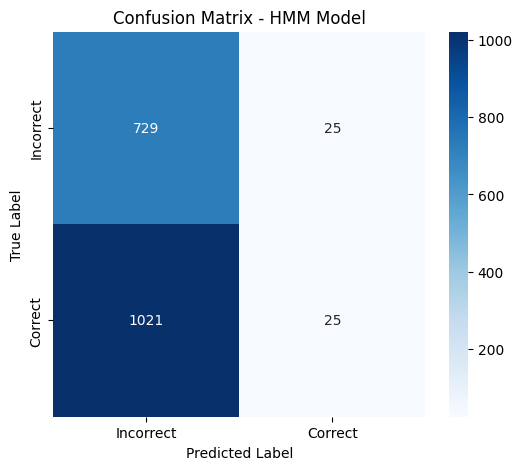


Classification Report (Test Set):
 <function classification_report at 0x7db8a77491c0>


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.metrics import confusion_matrix, classification_report, log_loss, roc_auc_score, mean_squared_error, f1_score
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('data.csv')

# Convert categorical columns to numerical values
df['Student ID'] = df['Student ID'].astype('category').cat.codes
df['Skill ID'] = df['Skill ID'].astype('category').cat.codes

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=50)

# Extract sequences for HMM
train_sequences = [train_df[train_df["Student ID"] == sid]["Correctness"].values for sid in train_df["Student ID"].unique()]
test_sequences = [test_df[test_df["Student ID"] == sid]["Correctness"].values for sid in test_df["Student ID"].unique()]

# Train HMM (2 states: Knowing, Not Knowing)
hmm_model = hmm.MultinomialHMM(n_components=5, n_iter=100, random_state=42)
hmm_model.fit(np.concatenate(train_sequences).reshape(-1, 1))

# Predict probabilities for training set
train_preds = [hmm_model.predict_proba(seq.reshape(-1, 1))[:, 1] for seq in train_sequences]
train_true = np.concatenate(train_sequences)
train_pred_probs = np.concatenate(train_preds)

# Predict probabilities for testing set
test_preds = [hmm_model.predict_proba(seq.reshape(-1, 1))[:, 1] for seq in test_sequences]
test_true = np.concatenate(test_sequences)
test_pred_probs = np.concatenate(test_preds)

# Convert probabilities to binary predictions (Threshold = 0.5)
train_pred_binary = (train_pred_probs >= 0.5).astype(int)
test_pred_binary = (test_pred_probs >= 0.5).astype(int)

# Compute Training Metrics
train_rmse = np.sqrt(mean_squared_error(train_true, train_pred_probs))
train_logloss = log_loss(train_true, train_pred_probs)
train_auc = roc_auc_score(train_true, train_pred_probs)
train_f1 = f1_score(train_true, train_pred_binary)

# Compute Testing Metrics
test_rmse = np.sqrt(mean_squared_error(test_true, test_pred_probs))
test_logloss = log_loss(test_true, test_pred_probs)
test_auc = roc_auc_score(test_true, test_pred_probs)
test_f1 = f1_score(test_true, test_pred_binary)

# Compute Differences
rmse_diff = abs(train_rmse - test_rmse)
logloss_diff = abs(train_logloss - test_logloss)
auc_diff = abs(train_auc - test_auc)
f1_diff = abs(train_f1 - test_f1)

# Print Evaluation Metrics
print("\n🔹 Model Performance Summary 🔹")
print(f"✅ RMSE (Train): {train_rmse:.4f} | (Test): {test_rmse:.4f} | Difference: {rmse_diff:.4f}")
print(f"✅ Log Loss (Train): {train_logloss:.4f} | (Test): {test_logloss:.4f} | Difference: {logloss_diff:.4f}")
print(f"✅ AUC (Train): {train_auc:.4f} | (Test): {test_auc:.4f} | Difference: {auc_diff:.4f}")
print(f"✅ F1 Score (Train): {train_f1:.4f} | (Test): {test_f1:.4f} | Difference: {f1_diff:.4f}")

# Compute Confusion Matrix for Testing
conf_matrix = confusion_matrix(test_true, test_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Incorrect", "Correct"], yticklabels=["Incorrect", "Correct"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - HMM Model")
plt.show()

# Print Classification Report
print("\nClassification Report (Test Set):\n", classification_report)
